# Intro to Data Analysis:
## Titanic Survival Data

The data taken from the Kaggle website takes 891 of the 2224 passengers that were aboard the RMS Titanic went it sunk in 1912. The following analysis will do the following:
   - Give basic information about the passengers:
       - Survival Rate
       - Distribution of socio-economic status
       - Distribution of age
       - Distribution of sex
       - Distribution of point of embarkment
   - Did people with higher class have higher survival rates?
   - Did men or women have higher survival rates?
   - Was gender or class a stronger predictor for survival?

## Load the data

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Load the data
data_file = 'titanic_data.csv'

titanic_data = pd.read_csv(data_file)

## Get basic information about the sample

('total', 891)
('lived: ', 342)
('perished: ', 549)
('survival rate: ', 38.38383838383838)


[<matplotlib.text.Text at 0x1112a9890>, <matplotlib.text.Text at 0x11127a350>]

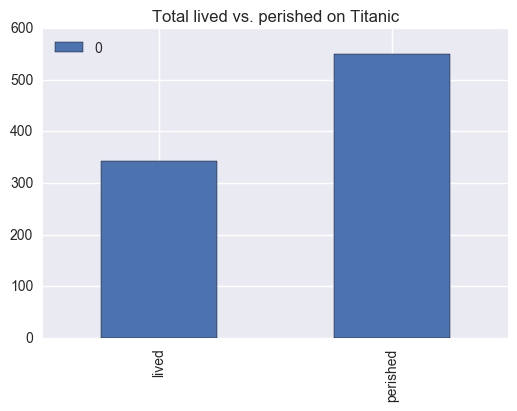

In [14]:
# survival rate
total_occupants = len(titanic_data)
num_lived = titanic_data['Survived'].sum()
num_perished = total_occupants - titanic_data['Survived'].sum()
survival_rate =  (float(num_lived) / total_occupants) * 100

print('total', total_occupants)
print('lived: ', num_lived)
print('perished: ', num_perished)
print('survival rate: ', survival_rate)

# graph the survived vs. perished data
total_dist = pd.DataFrame(np.array([num_lived,num_perished,]))
total_hist = total_dist.plot(kind='bar')
total_hist.set_title('Total lived vs. perished on Titanic')
total_hist.set_xticklabels(('lived', 'perished'))

### Takeaway
549 of the 891 passengers in this sample perished. That's a survival rate of around 38%. A majority of passengers (in this sample) perished. 

('lower class: ', 491)
('middle class: ', 184)
('upper class: ', 216)


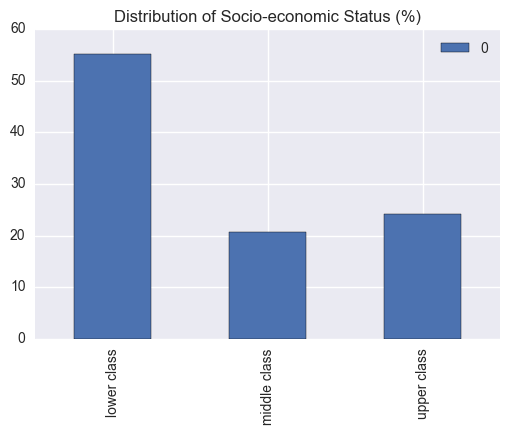

In [76]:
# distribution of socio-economic status (ses)
ses_data = titanic_data['Pclass']
lower_class = ses_data[ses_data == 3]
middle_class = ses_data[ses_data == 2]
upper_class = ses_data[ses_data == 1]

# get the count for each ses
lower_class_count = lower_class.count()
middle_class_count = middle_class.count()
upper_class_count = upper_class.count()

# get the percentages for each ses
lower_class_perc = lower_class_count/float(total_occupants) * 100
middle_class_perc = middle_class_count/float(total_occupants) * 100
upper_class_perc = upper_class_count/float(total_occupants) * 100

print('lower class: ', lower_class_count)
print('middle class: ', middle_class_count)
print('upper class: ', upper_class_count)

# put percentages into data frame and graph
ses_df = pd.DataFrame(np.array([lower_class_perc,
                                middle_class_perc,
                                upper_class_perc]))

ses_hist = ses_df.plot(kind='bar')
ses_hist.set_title('Distribution of Socio-economic Status (%)')
ses_hist.set_xticklabels(('lower class', 'middle class', 'upper class'))

### Takeaway
The crew, according to this sample, was mostly lower class with a handful of upper and middle class passengers.

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

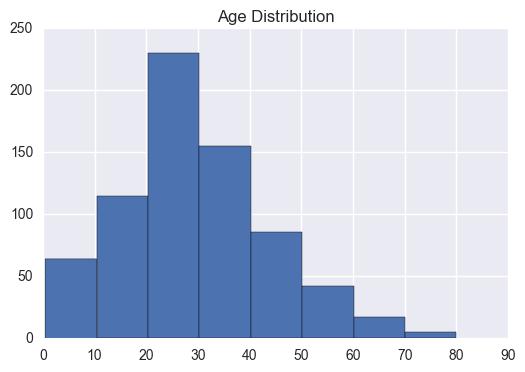

In [77]:
# distribution of age -- for those whose age was listed
age = titanic_data['Age']
age_hist = age.hist(bins=8)
age_hist.set_title('Age Distribution')
age.describe()

### Takeaway
Passengers in this sample are mostly young adults - in their 20's and 30's

('percentage of males: ', 64.758698092031437)
('percentage of females: ', 35.241301907968577)


[<matplotlib.text.Text at 0x116e6d3d0>, <matplotlib.text.Text at 0x116e61d10>]

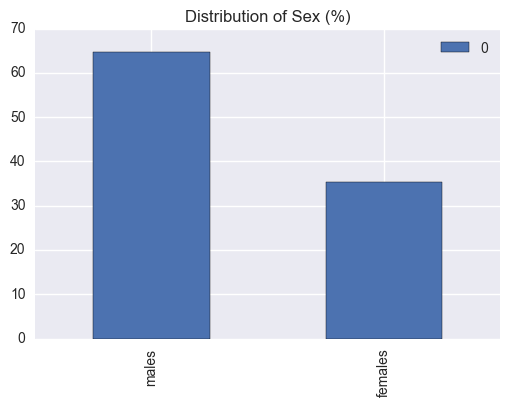

In [78]:
# distribution of sex
sex = titanic_data['Sex']
males = sex[sex == 'male']
females = sex[sex == 'female']

male_count = males.count()
female_count = females.count()

male_perc = (male_count / float(sex.count())) * 100
female_perc = (female_count / float(sex.count())) * 100

print('percentage of males: ', male_perc)
print('percentage of females: ', female_perc)

sex_df = pd.DataFrame(np.array([male_perc, female_perc]))
sex_hist = sex_df.plot(kind='bar')
sex_hist.set_title('Distribution of Sex (%)')
sex_hist.set_xticklabels(('males', 'females'))

### Takeaway
In this sample there are nearly twice as many male passengers (65%) than female passengers (35%). 

(72.440944881889763, ' from South Hampton')
(8.6614173228346463, ' from Queenstown')
(18.897637795275589, ' from Cherbourg')


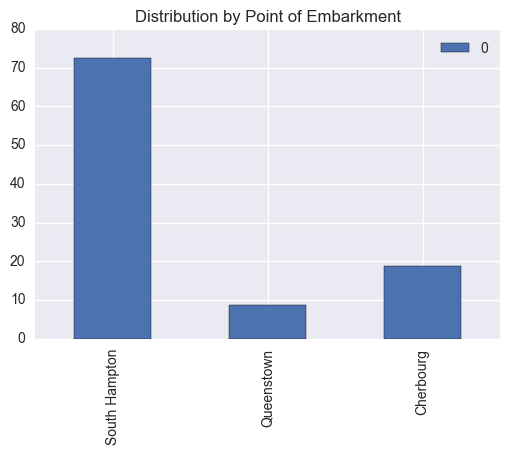

In [79]:
# distribution of point of embarkment
embarkment = titanic_data['Embarked']
south_hampton = embarkment[embarkment == 'S']
queenstown = embarkment[embarkment == 'Q']
cherbourg = embarkment[embarkment == 'C']

south_hampton_total = south_hampton.count()
queenstown_total = queenstown.count()
cherbourg_total = cherbourg.count() 

emb_total = float(embarkment.count())

sh_perc = (south_hampton_total/emb_total) * 100
qt_perc = (queenstown_total/emb_total) * 100
cb_perc = (cherbourg_total/emb_total) * 100

print(sh_perc, ' from South Hampton')
print(qt_perc, ' from Queenstown')
print(cb_perc, ' from Cherbourg')

emb_df = pd.DataFrame(np.array([sh_perc, qt_perc, cb_perc]))
emb_hist = emb_df.plot(kind='bar')
emb_hist.set_title('Distribution by Point of Embarkment')
emb_hist.set_xticklabels(('South Hampton', 'Queenstown', 'Cherbourg'))

### Takeaway
A vast majority of the passengers (72.4%) in this sample are from South Hampton.

## Did passengers of higher socio-economic status have a higher survival rate?
There were reportedly 68 lifeboats aboard the Titanic which were designed to accomodate 1,178 out of the 2224 passengers onboard. Furthermore, those lifeboats were designed to carry passengers to a rescue vessel and not as an independent vessel and didn't guarantee safety and security for its passengers. It was also reported that most of the people who got to the lifeboats were of first or second class. 

I'd like to determine the extent to which higher class passengers were allowed to board the lifeboats and thus, survive.  

('lower-class survival rate: ', 24.236252545824847)
('middle-class survival rate: ', 47.282608695652172)
('upper-class survival rate: ', 62.962962962962962)


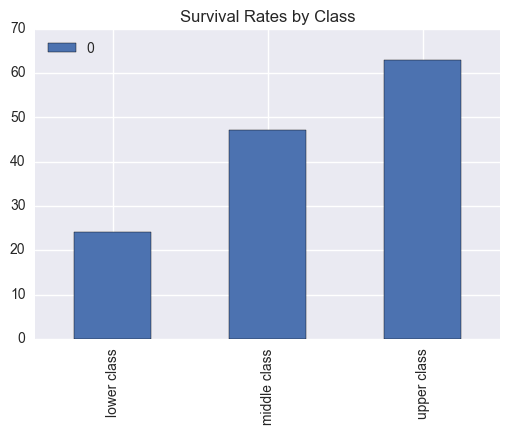

In [90]:
# group by class and find the sum of the survivors
class_data = titanic_data.groupby('Pclass')['Survived'].sum()

# calculate survival rates amongst different classes
lower_class_survival = (class_data.loc[3] / float(lower_class_count))*100
middle_class_survival = (class_data.loc[2] / float(middle_class_count))*100
upper_class_survival = (class_data.loc[1] / float(upper_class_count))*100

print('lower-class survival rate: ', lower_class_survival)
print('middle-class survival rate: ', middle_class_survival)
print('upper-class survival rate: ', upper_class_survival)

class_survival_rates = np.array([lower_class_survival, middle_class_survival, upper_class_survival])
class_survival_df = pd.DataFrame(class_survival_rates)
bg = class_survival_df.plot(kind='bar')
bg.set_title('Survival Rates by Class')
bg.set_xticklabels(('lower class', 'middle class', 'upper class'))

### Takeaway
Most passengers who were in the upper class survived. Survival rates decrease as class gets lower. 

[-1.29461296  0.15437345  1.14023951]


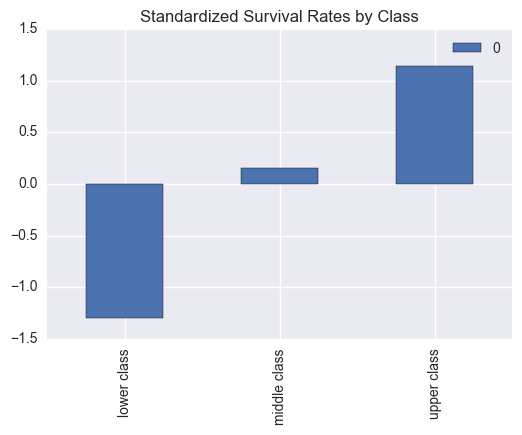

In [91]:
# Compare each to overall survival rate
survival_rates = np.array([lower_class_survival, middle_class_survival, upper_class_survival])

def standardize(values):
    standardized_values = (values - values.mean())/values.std() 
    return standardized_values

std_survival_rates = np.array(standardize(survival_rates))
class_std_df = pd.DataFrame(std_survival_rates)
class_std_bar = class_std_df.plot(kind='bar')
class_std_bar.set_title('Standardized Survival Rates by Class')
class_std_bar.set_xticklabels(('lower class', 'middle class', 'upper class'))
print(std_survival_rates)

## How much more likely were women and children to survive compared to men?
It was reported that when the lifeboats were being loaded with passengers, the "woman and children first" policy had been misinterpreted as "women and children ONLY", thus some lifeboats loaded with women and children and specifically NOT loaded with men. This would have exacerbated the survival rates between men and women and children.

To what extent were women and children more likely to have survived?

### Missing age value
177 values out of 891 age values were missing. To increase the fidelity of this age-based query, I infered that some of the passengers with missing ages were adults based on having the title "Mrs.". This, of course, assumes that the person is a married adult woman and not a child. 

*Note: I imagine I could use some prediction algorithm to impute some of the other missing age values, but I'll leave that for a later time*

     0
0  519
1  372


[<matplotlib.text.Text at 0x118d1a950>, <matplotlib.text.Text at 0x118d224d0>]

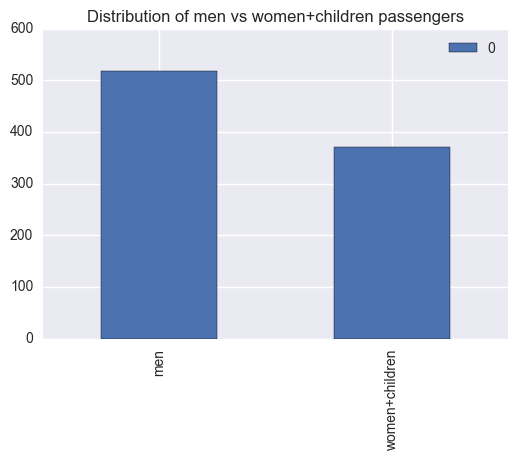

In [92]:
# find survival rates for men, women, and children
titanic_data['Age'].fillna(-1, inplace=True)
no_age_count = titanic_data[titanic_data['Age'] == -1]['PassengerId'].count()

# create a column that differentiates children from adults
def isAdult(df):
    if df['Age'] > 0 and df['Age'] < 18:
        return 'Child'
    elif df['Age'] == -1:
        # try to determine is this is an adult
        if df['Name'].find('Mrs.'):
            return df.Sex
    else:
        return df.Sex

titanic_data['isAdult'] = titanic_data.apply(isAdult,axis=1)

wcm_total_data = titanic_data.groupby('isAdult').count()

# get the totals for men, women, and children
children_total = wcm_total_data['Survived'].loc['Child']
women_total = wcm_total_data['Survived'].loc['female']
women_and_children_total = children_total + women_total
men_total = wcm_total_data['Survived'].loc['male']

# graph the distribution of the survivors
wcm_dist = pd.DataFrame(np.array([men_total,women_and_children_total]))

print(wcm_dist)

wcm_hist = wcm_dist.plot(kind='bar')
wcm_hist.set_title('Distribution of men vs women+children passengers')
wcm_hist.set_xticklabels(('men', 'women+children'))

           0
0  16.570328
1  68.817204


[<matplotlib.text.Text at 0x118eb9310>, <matplotlib.text.Text at 0x118d03450>]

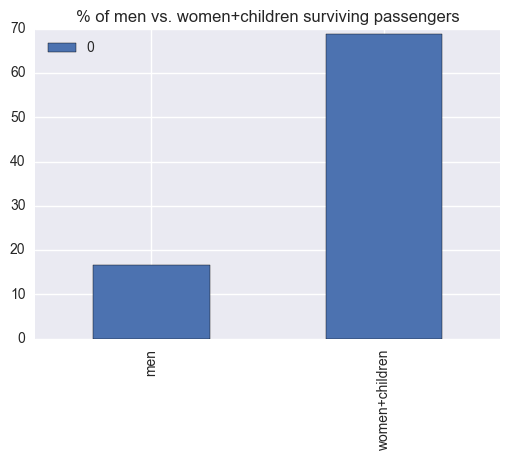

In [93]:
wcm_survival = titanic_data.groupby('isAdult')['Survived'].sum()

# get survival statistics for women
women_survived = wcm_survival.loc['female']
women_survival_rate = (women_survived / float(women_total)) * 100

# get survival statistics for children
children_survived = wcm_survival.loc['Child']
children_survival_rate = (children_survived / float(children_total)) * 100

# women and children combined
women_and_children_survival_rate = (children_survived + women_survived) / float(women_and_children_total) * 100

# get survival statistics for men
men_survived = wcm_survival.loc['male']
men_survival_rate = (men_survived / float(men_total)) * 100

# combine survival statistics 
wcm_survival_rates = np.array([men_survival_rate,women_and_children_survival_rate])
wcm_survival_dist = pd.DataFrame(wcm_survival_rates)

print(wcm_survival_dist)

wcm_survival_hist = wcm_survival_dist.plot(kind='bar')
wcm_survival_hist.set_title('% of men vs. women+children surviving passengers')
wcm_survival_hist.set_xticklabels(('men', 'women+children'))

     0
0 -1.0
1  1.0


[<matplotlib.text.Text at 0x118fb60d0>, <matplotlib.text.Text at 0x119160790>]

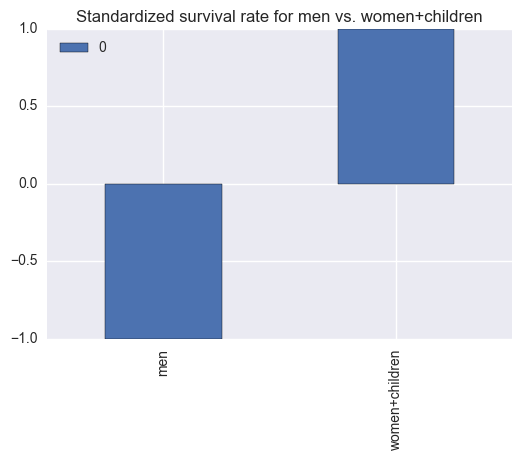

In [94]:
# standardize the survival rates for men vs women+children and graph
std_wcm_survival_rates_df = pd.DataFrame(standardize(wcm_survival_rates))
print(std_wcm_survival_rates_df)
s = std_wcm_survival_rates_df.plot(kind='bar')
s.set_title('Standardized survival rate for men vs. women+children')
s.set_xticklabels(('men', 'women+children'))

### Takeaway
As expected, a lot more women and children were able to survive relative to the number of men. If women and children were rounded up and placed on lifeboats as a matter of policy, then this shouldn't be surpising. 

## Was gender or class a stronger predictor for survival?


          0
0 -1.287449
1 -0.943541
2  0.090364
3  0.793815
4  1.346811


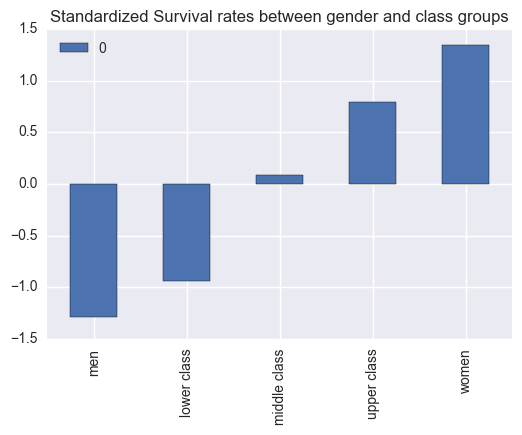

In [95]:
# get just men vs. women survival rates
wm_survival_rates = np.array([women_survival_rate,men_survival_rate])



# standardize gender and class survival rates and graph
gender_class_survival_rate = np.append(wm_survival_rates, class_survival_rates)
gender_class_survival_rate.sort()

gender_class_survival_rate_std = pd.DataFrame(standardize(gender_class_survival_rate))
print(gender_class_survival_rate_std)
gcs_bar = gender_class_survival_rate_std.plot(kind='bar')
gcs_bar.set_title('Standardized Survival rates between gender and class groups')
gcs_bar.set_xticklabels(('men', 'lower class', 'middle class', 'upper class', 'women'))

### Takeaway
Based on the standardized survival values for gender and class seen above, it would seem that upper-class women were much more likely to have survived to ordeal than any other cohort. Men of lower-class, on the other hand, were probably less least to have survived. 

## Final Thoughts
Men and people of lower-class were more likely to have perished according to my analysis of this sample. Women, children, and people of higher-class were more likely to have survived. This is all pretty much in line with my intuition. There is typically a "women and children first" policy that will boost survival chances for those cohorts.  Though the definition of children may be subjective in this case. 

There were, however, a lot more men than women and more lower-class than upper and middle-class passengers onboard. It seems like that imbalance might have somehow contributed to the much lower survival rates for those cohorts (men and lower-class).

## Resources Used
    - Titanic Information: https://en.wikipedia.org/wiki/Sinking_of_the_RMS_Titanic
    - Missing values: https://discussions.udacity.com/t/missing-age-titanic-data/165798/2
    - http://www.cs.tufts.edu/comp/150VAN/demos/DataWrangling.pdf
    - the numpy/pandas cheat sheet
    - the udacity lectures
    - matplotlib docs: https://matplotlib.org/